# Homework 4: Data Visualization
- **Name**:  Subham Gupta
- **UB Username**: subhamgu
- **UB Person Number**:  50538333

---
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

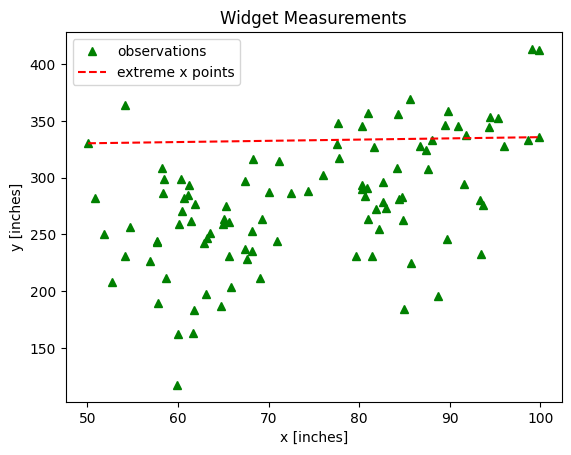

In [ ]:
# Use "Code" cells to import libraries,
# read .csv data, and
# create your plots.
# ...
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns
# raed scatter data.csv
df = pd.read_csv('scatter_data.csv')
df.head()
# remove the percent sign (%) if appear in any row or column name, (which denotes a comment)
df.columns = df.columns.str.replace('%', '')
df.columns = df.columns.str.replace(' ', '')
df.head()
# plot the data points as green triangles
plt.plot(df['x'], df['y'], 'g^')

# plot a line from the minimum x-value to the maximum x-value. The line should be dashed and colored red
plt.plot([df['x'].min(), df['x'].max()], [df.loc[df['x'].idxmin(), 'y'], df.loc[df['x'].idxmax(), 'y']], 'r--')

# include a title for your plot
plt.title('Widget Measurements')

# label the x- and y-axes
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')

# include a legend for your plot
plt.legend(['observations', 'extreme x points'])

In [ ]:
# It's OK to break up your code into multiple cells.

### Problem 2 - Histogram

In [ ]:
# Use "Code" cells to import libraries,
# read .csv data, and
# create your plots.
# ...
import pandas as pd

# Read the data from the CSV file, ignoring lines starting with '%'
df2 = pd.read_csv('student_grades.csv', comment='%', header=None, names=['% studentID', ' avgScore '])

df2.head()


,% studentID,avgScore
0,0,81.563259
1,1,67.426527
2,2,86.415197
3,3,80.387361
4,4,76.669249


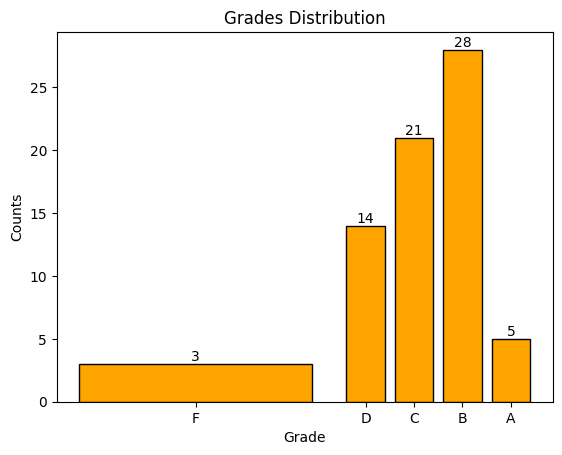

In [ ]:
# Define the bin edges and labels
bins = [0, 60, 70, 80, 90, 100]
labels = ['F', 'D', 'C', 'B', 'A']

# Create the histogram with specified bins, colors, and outline
plt.hist(df2[' avgScore '], bins=bins, edgecolor='black', color='orange', rwidth=0.8)

# Set x-axis and y-axis labels
plt.xlabel('Grade')
plt.ylabel('Counts')

# Set the title of the histogram
plt.title('Grades Distribution')

# Customize the x-axis labels using the defined labels
#plt.xticks(bins, labels)
plt.xticks([(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)], labels)

# Display counts above each bar
for i in range(len(bins) - 1):
    count = ((df2[' avgScore '] >= bins[i]) & (df2[' avgScore '] < bins[i + 1])).sum()
    plt.text((bins[i] + bins[i + 1]) / 2, count, str(count), ha='center', va='bottom')

# Show the histogram
plt.show()



### Problem 3 - Barplot and Boxplot in the Same Figure

In [ ]:
# Use "Code" cells to import libraries,
# read .csv data, and
# create your plots.
# ...
import seaborn as sns

# Reading the data from the CSV file, ignoring rows that begin with '%'
df3 = pd.read_csv('solution_data.csv')
df3.columns = df3.columns.str.replace('%', '')
df3.columns = df3.columns.str.replace(' ', '')
df3.head()

,Problem,SolnMethod,Value
0,0,genetic algorithm,112.749860
1,0,simulated annealing,75.220917
2,0,tabu search,111.574225
3,0,optimal,166.170172
4,1,genetic algorithm,31.819762


In [ ]:
df3['SolnMethod'] = df3['SolnMethod'].str.strip('|')
df3.head()

,Problem,SolnMethod,Value,OptimalOFV,optimality_gap
0,0,genetic algorithm,112.749860,166.170172,32.147955
1,0,simulated annealing,75.220917,166.170172,54.732600
2,0,tabu search,111.574225,166.170172,32.855444
3,0,optimal,166.170172,166.170172,0.000000
4,1,genetic algorithm,31.819762,48.634470,34.573643


In [ ]:
df3['OptimalOFV'] = df3.groupby('Problem')['Value'].transform(lambda x: x.loc[df3['SolnMethod'] == 'optimal'].iloc[0])
df3.head()


,Problem,SolnMethod,Value,OptimalOFV
0,0,genetic algorithm,112.749860,166.170172
1,0,simulated annealing,75.220917,166.170172
2,0,tabu search,111.574225,166.170172
3,0,optimal,166.170172,166.170172
4,1,genetic algorithm,31.819762,48.634470


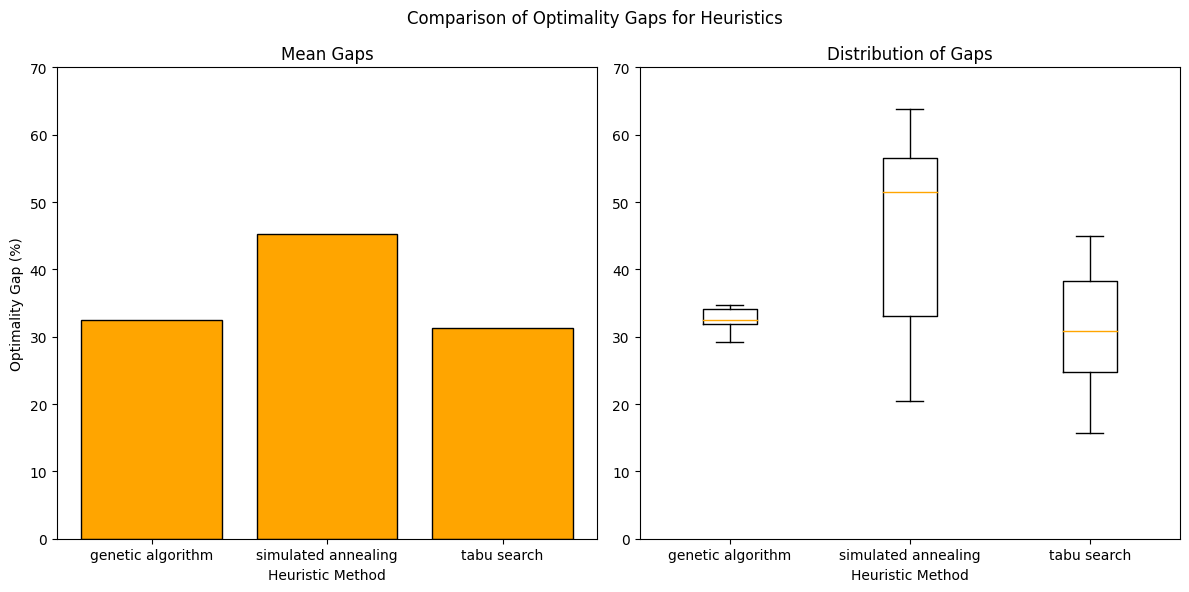

In [ ]:
# calculate the optimality gap for each heuristic
df3['optimality_gap'] = (df3['OptimalOFV'] - df3['Value']) / df3['OptimalOFV'] * 100
# Filter data for specified heuristics
filtered_df = df3[df3['SolnMethod'].isin(['genetic algorithm', 'simulated annealing', 'tabu search'])]
# Create the figure and the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for the first subplot (bar plot)
axs[0].bar(filtered_df['SolnMethod'].unique(), filtered_df.groupby('SolnMethod')['optimality_gap'].mean(), color='orange', edgecolor='black')
axs[0].set_title('Mean Gaps')
axs[0].set_xlabel('Heuristic Method')
axs[0].set_ylabel('Optimality Gap (%)')
axs[0].set_yticks(range(0, int(filtered_df['optimality_gap'].max()) + 10, 10))

# Plot for the second subplot (box plot)
axs[1].boxplot([filtered_df[filtered_df['SolnMethod'] == method]['optimality_gap'] for method in filtered_df['SolnMethod'].unique()],
               labels=filtered_df['SolnMethod'].unique(), medianprops=dict(color='orange'))
axs[1].set_title('Distribution of Gaps')
axs[1].set_xlabel('Heuristic Method')
axs[1].set_yticks(range(0, int(filtered_df['optimality_gap'].max()) + 10, 10))

# Set the same y-axis scale for both subplots
ylim = axs[1].get_ylim()
axs[0].set_ylim(ylim)

# Adjust layout
plt.suptitle('Comparison of Optimality Gaps for Heuristics')
plt.tight_layout()
plt.show()


---
## Part 2 - Explore New Plot Types

A 3D scatter plot is used to represent data points in a three-dimensional space.
Each data point corresponds to a set of three features (in this case, Sepal Length, Sepal Width, and Petal Length) for each sample in the dataset.

Axes Labels:

    The x-axis, y-axis, and z-axis represent the three features (Sepal Length, Sepal Width, and Petal Length).
    Labeling each axis helps viewers understand which variable each axis represents.

Color and Marker Differentiation:

    Different colors and markers are used to distinguish data points belonging to different categories or classes.
    For example, in this code, green circles, blue triangles, and red squares are used to represent data points for the three different species of iris flowers.

Legend:

    The legend helps viewers identify the different categories represented by the colors and markers.
    In the code, the legend provides the labels 'Iris Setosa', 'Iris Virginica', and 'Iris Versicolor' for the corresponding colors and markers.

Title:

    A descriptive title for the plot provides a clear context for what the visualization represents.
    In the provided code, the title '3D Scatter Plot for Iris Dataset' gives a clear understanding of the purpose of the visualization.

Visualization Perspective:

    Adjusting the viewing angle can offer a better understanding of the distribution of data points in the 3D space.
    Users can rotate the plot to view it from different perspectives to gain insights into the relationship between the three variables.

- **URL of Example Code**:  https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
- **URL of Sample Data**:  https://www.kaggle.com/datasets/uciml/iris

In [23]:
# import data again
data = pd.read_csv('Iris.csv')

In [24]:
# unique values in species
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
# data of iris setosa
iris_setosa = data[data.Species == "Iris-setosa"]
# # data of iris virginica
iris_virginica = data[data.Species == "Iris-virginica"]
# # data of iris versicolor
iris_versicolor = data[data.Species == "Iris-versicolor"]

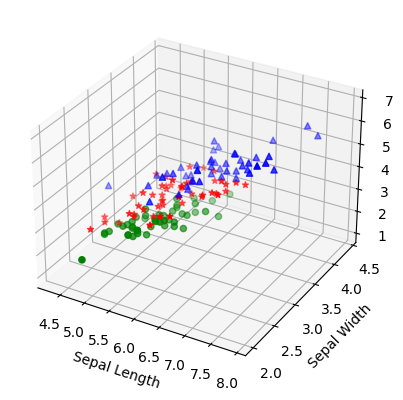

In [28]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(iris_setosa['SepalLengthCm'], iris_setosa['SepalWidthCm'], iris_setosa['PetalLengthCm'], c='g', marker='o')

ax.scatter(iris_virginica['SepalLengthCm'], iris_virginica['SepalWidthCm'], iris_virginica['PetalLengthCm'], c='b', marker='^')

ax.scatter(iris_versicolor['SepalLengthCm'], iris_versicolor['SepalWidthCm'], iris_versicolor['PetalLengthCm'], c='r', marker='*')

ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

plt.show()